In [1]:
# pip install --upgrade tensorflow

In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

## Single layer
### Linear data


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

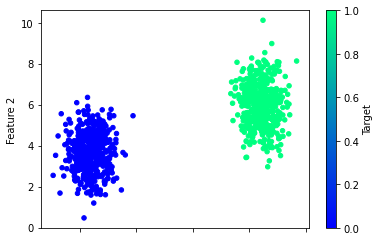

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))


In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24/24 [==============================] - 0s 631us/step - loss: 0.5411 - accuracy: 0.9493
Epoch 2/100
24/24 [==============================] - 0s 607us/step - loss: 0.5259 - accuracy: 0.9533
Epoch 3/100
24/24 [==============================] - 0s 607us/step - loss: 0.5112 - accuracy: 0.9547
Epoch 4/100
24/24 [==============================] - 0s 607us/step - loss: 

24/24 [==============================] - 0s 564us/step - loss: 0.1114 - accuracy: 1.0000
Epoch 73/100
24/24 [==============================] - 0s 564us/step - loss: 0.1096 - accuracy: 1.0000
Epoch 74/100
24/24 [==============================] - 0s 607us/step - loss: 0.1078 - accuracy: 1.0000
Epoch 75/100
24/24 [==============================] - 0s 564us/step - loss: 0.1060 - accuracy: 1.0000
Epoch 76/100
24/24 [==============================] - 0s 564us/step - loss: 0.1043 - accuracy: 1.0000
Epoch 77/100
24/24 [==============================] - 0s 564us/step - loss: 0.1026 - accuracy: 1.0000
Epoch 78/100
24/24 [==============================] - 0s 564us/step - loss: 0.1009 - accuracy: 1.0000
Epoch 79/100
24/24 [==============================] - 0s 520us/step - loss: 0.0993 - accuracy: 1.0000
Epoch 80/100
24/24 [==============================] - 0s 564us/step - loss: 0.0977 - accuracy: 1.0000
Epoch 81/100
24/24 [==============================] - 0s 564us/step - loss: 0.0962 - accuracy: 

<AxesSubplot:>

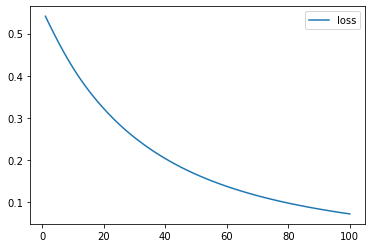

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

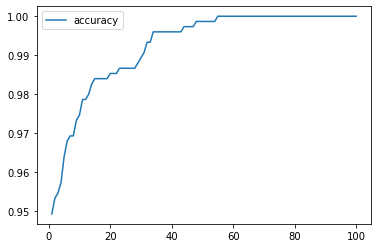

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 - 0s - loss: 0.0672 - accuracy: 1.0000 - 78ms/epoch - 10ms/step
Loss: 0.06720881164073944, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## Non-linear data


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

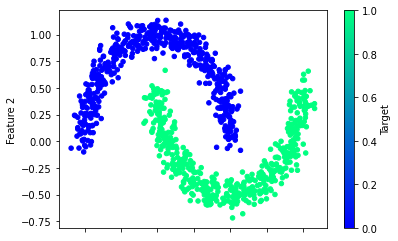

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 911us/step - loss: 1.0708 - accuracy: 0.4880
Epoch 2/100
24/24 [==============================] - 0s 911us/step - loss: 0.9050 - accuracy: 0.5213
Epoch 3/100
24/24 [==============================] - 0s 824us/step - loss: 0.8024 - accuracy: 0.5507
Epoch 4/100
24/24 [==============================] - 0s 867us/step - loss: 0.7345 - accuracy: 0.5813
Epoch 5/100
24/24 [==============================] - 0s 911us/step - loss: 0.6835 - accuracy: 0.6027
Epoch 6/100
24/24 [==============================] - 0s 867us/step - loss: 0.6427 - accuracy: 0.6147
Epoch 7/100
24/24 [==============================] - 0s 911us/step - loss: 0.6074 - accuracy: 0.6333
Epoch 8/100
24/24 [==============================] - 0s 911us/step - loss: 0.5777 - accuracy: 0.6520
Epoch 9/100
24/24 [==============================] - 0s 954us/step - loss: 0.5510 - accuracy: 0.6680
Epoch 10/100
24/24 [==============================] - 0s 911us/step - loss: 0.5282 - accura

24/24 [==============================] - 0s 824us/step - loss: 0.2634 - accuracy: 0.8920
Epoch 82/100
24/24 [==============================] - 0s 824us/step - loss: 0.2631 - accuracy: 0.8907
Epoch 83/100
24/24 [==============================] - 0s 824us/step - loss: 0.2627 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 867us/step - loss: 0.2624 - accuracy: 0.8907
Epoch 85/100
24/24 [==============================] - 0s 824us/step - loss: 0.2621 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 824us/step - loss: 0.2618 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 824us/step - loss: 0.2615 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 824us/step - loss: 0.2613 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 824us/step - loss: 0.2610 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 824us/step - loss: 0.2609 - accuracy: 

<AxesSubplot:>

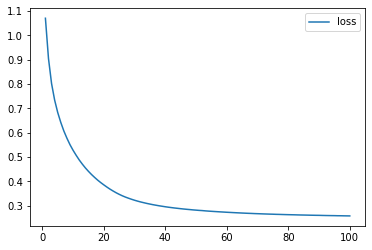

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

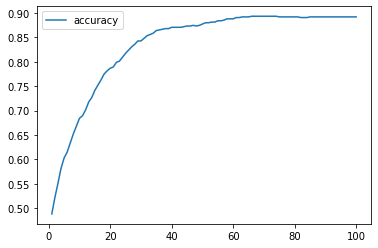

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Multi-layer

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24/24 [==============================] - 0s 703us/step - loss: 0.7267 - accuracy: 0.4573
Epoch 2/100
24/24 [==============================] - 0s 520us/step - loss: 0.6730 - accuracy: 0.4467
Epoch 3/100
24/24 [==============================] - 0s 607us/step - loss: 0.6252 - accuracy: 0.4587
Epoch 4/100
24/24 [==============================] - 0s 650us/step - loss: 

Epoch 72/100
24/24 [==============================] - 0s 650us/step - loss: 0.2203 - accuracy: 0.9080
Epoch 73/100
24/24 [==============================] - 0s 650us/step - loss: 0.2198 - accuracy: 0.9067
Epoch 74/100
24/24 [==============================] - 0s 650us/step - loss: 0.2193 - accuracy: 0.9067
Epoch 75/100
24/24 [==============================] - 0s 694us/step - loss: 0.2189 - accuracy: 0.9080
Epoch 76/100
24/24 [==============================] - 0s 650us/step - loss: 0.2183 - accuracy: 0.9080
Epoch 77/100
24/24 [==============================] - 0s 650us/step - loss: 0.2179 - accuracy: 0.9080
Epoch 78/100
24/24 [==============================] - 0s 737us/step - loss: 0.2175 - accuracy: 0.9080
Epoch 79/100
24/24 [==============================] - 0s 650us/step - loss: 0.2171 - accuracy: 0.9080
Epoch 80/100
24/24 [==============================] - 0s 694us/step - loss: 0.2166 - accuracy: 0.9080
Epoch 81/100
24/24 [==============================] - 0s 650us/step - loss: 0.2162